In [441]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Libraries

In [442]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# Set the theme for seaborn
sns.set_theme()

# Suppress warnings
warnings.filterwarnings('ignore')

# Get Tha Data

In [443]:
data = pd.read_csv("C:/Users/hpc/OneDrive/Desktop/DT/ML/Titanic Survival Project/train(1).csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Info

In [444]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [445]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [446]:
data.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


# EDA

In [447]:
data.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [448]:
data.duplicated().sum()

np.int64(0)

In [449]:
# function to visualize by histplot
def visualize_histplot(data, column_name, bins=20):
    if column_name in data.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[column_name], bins=bins, kde=True)
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column_name}')
        plt.show()
    else:
        print(f"Column '{column_name}' doesn't exist in the dataset.")

In [450]:
# function to visualize by countplot
def visualize_countplot(data, column_name):
    if column_name in data.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=data, x=column_name, palette="Set2")
        plt.xlabel(column_name)
        plt.ylabel('Count')
        plt.title(f'Count Plot of {column_name}')
        plt.show()
    else:
        print(f"Column '{column_name}' doesn't exist in the dataset.")

In [451]:
data["Survived"].nunique() , data["Survived"].unique()

(2, array([0, 1]))

In [452]:
data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

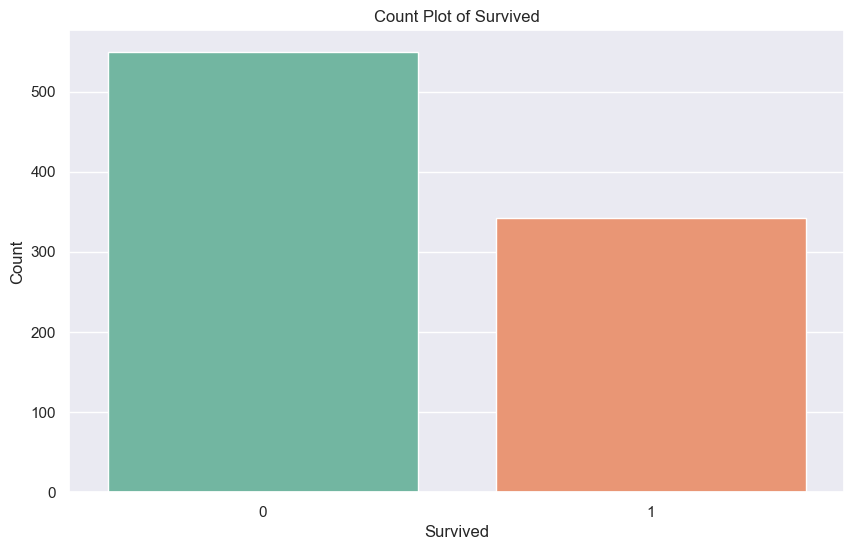

In [453]:
visualize_countplot(data, 'Survived')

* Most People Not Survived

In [454]:
data["Pclass"].nunique() , data["Pclass"].unique()

(3, array([3, 1, 2]))

In [455]:
data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

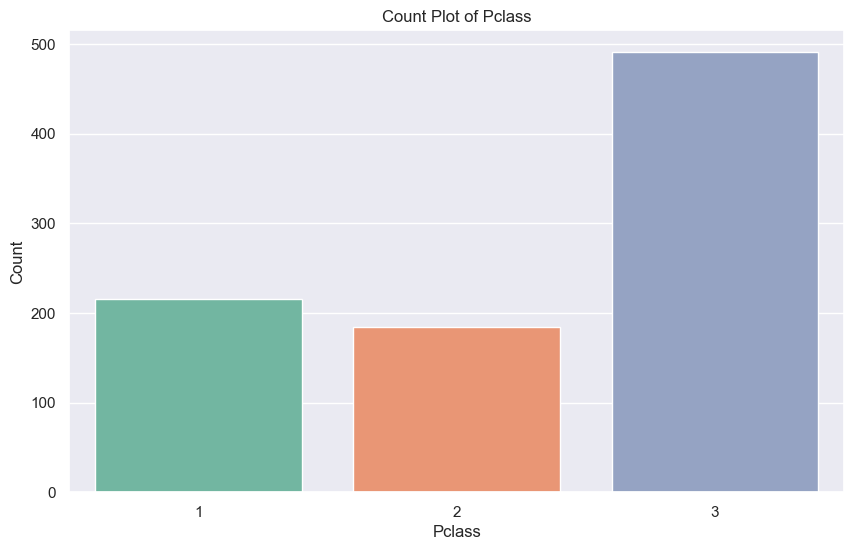

In [456]:
visualize_countplot(data, 'Pclass')

* Most People Was Pclass 3

In [457]:
data["Name"].duplicated().sum()

np.int64(0)

*We will generate new needed columns from name column after a while*

In [458]:
data["Sex"].nunique() , data["Sex"].unique()

(2, array(['male', 'female'], dtype=object))

In [459]:
data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

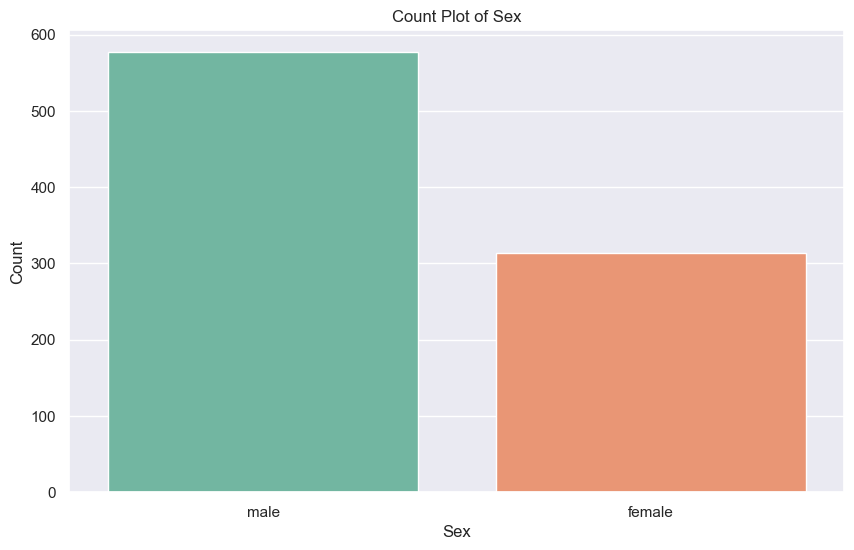

In [460]:
visualize_countplot(data , "Sex")

* Most Genre Was Males on the ship

In [461]:
data["Age"].nunique() , data["Age"].unique()

(88,
 array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
         4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
         8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
        49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
        16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
        71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
        51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
        45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
        60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
        70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ]))

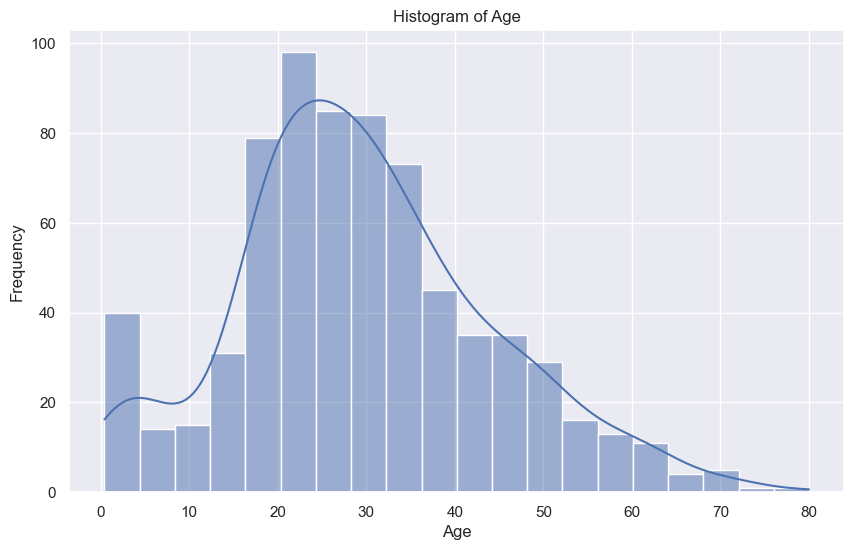

In [462]:
visualize_histplot(data , "Age")

* Most Age People were between 20 & 40 

In [463]:
data["Fare"].dtype , data["Fare"].nunique()

(dtype('float64'), 248)

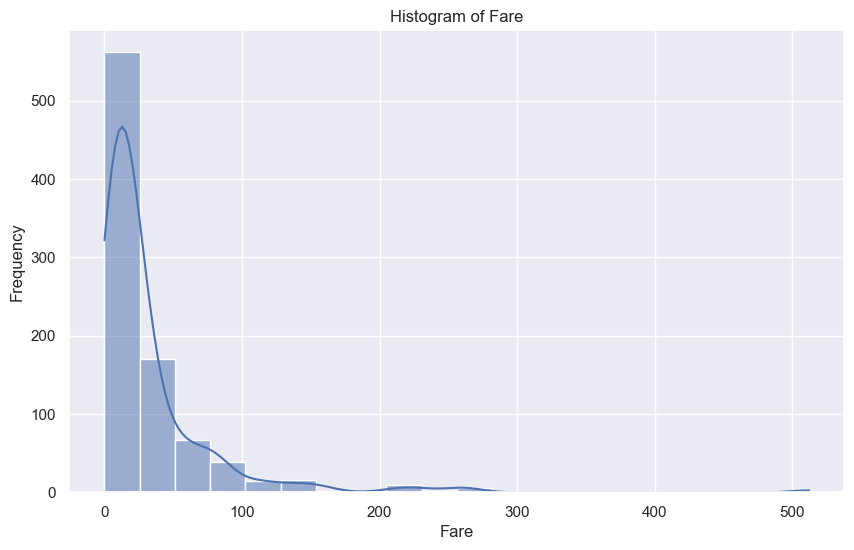

In [464]:
visualize_histplot(data , "Fare")

* Most Fare Are between 0 and 30 pounds

In [465]:
data["Cabin"].nunique() , data["Cabin"].unique()

(147,
 array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
        'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
        'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
        'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
        'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
        'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
        'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
        'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
        'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
        'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
        'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
        'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
        'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
        'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63

In [466]:
data["Cabin"].isna().mean()

np.float64(0.7710437710437711)

* We will drop this column because over 75% of data are nulls

In [467]:
data["Embarked"].nunique() , data["Embarked"].unique()

(3, array(['S', 'C', 'Q', nan], dtype=object))

In [468]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

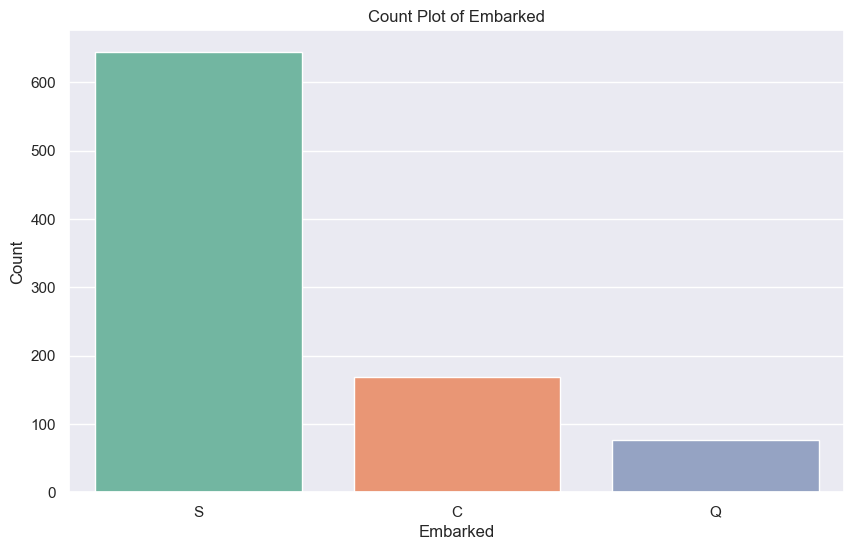

In [469]:
visualize_countplot(data , "Embarked")

* Most Embarked is S

# Some Cleaning

* We need to make the ticket column Numric to make it usable

In [470]:
data["Ticket"].nunique() , data["Ticket"].unique() 

(681,
 array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
        '330877', '17463', '349909', '347742', '237736', 'PP 9549',
        '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
        '244373', '345763', '2649', '239865', '248698', '330923', '113788',
        '347077', '2631', '19950', '330959', '349216', 'PC 17601',
        'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
        'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
        'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
        '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
        '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
        '2669', '113572', '36973', '347088', 'PC 17605', '2661',
        'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
        'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
        '248738', '364516', '345767', '345779', '330932', '113059',
       

In [471]:
data["Ticket"].isna().sum()

np.int64(0)

In [472]:
data["Ticket"] = data["Ticket"].str.extract('(\d+)') 
data["Ticket"] = data["Ticket"].astype('Int64')

In [473]:
data["Ticket"].isna().sum()

np.int64(4)

*The null values that appeared aren't many*

In [474]:
data["Ticket"].nunique() , data["Ticket"].unique() 

(635,
 <IntegerArray>
 [     5,  17599,      2, 113803, 373450, 330877,  17463, 349909, 347742,
  237736,
  ...
  349212, 349217, 349257,   7552,  34068, 392076, 211536, 112053, 111369,
  370376]
 Length: 636, dtype: Int64)

In [475]:
data["Ticket"].value_counts()

Ticket
5         21
2         20
4          8
1601       7
347082     7
          ..
392091     1
17592      1
347060     1
248706     1
350406     1
Name: count, Length: 635, dtype: Int64

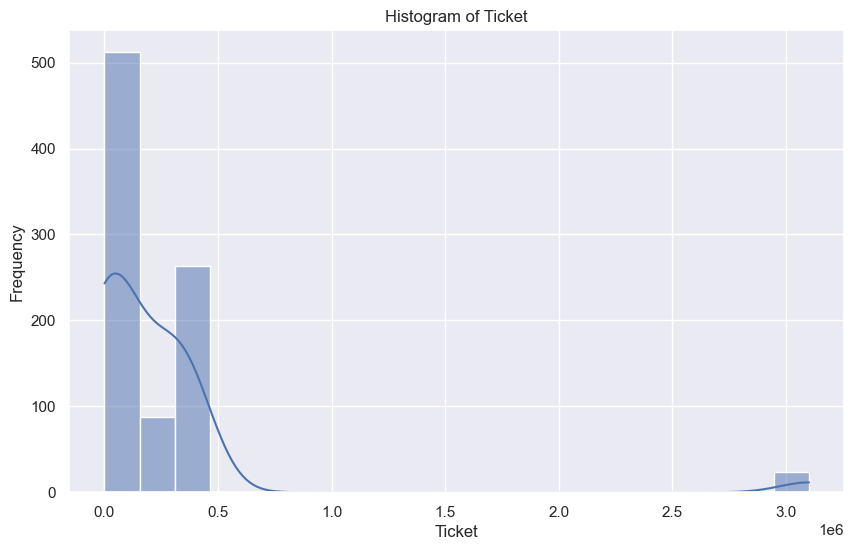

In [476]:
visualize_histplot(data , "Ticket")

# Feature Engineering

* We need to extract Passenger type column from name dolumn
* and we need to make a new column(Family Size)  from SibSp & Parch columns
* also We need Extract Age category column from Age Column

In [477]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,17595,28.7125,C49,C
622,623,1,3,"Nakid, Mr. Sahid",male,20.0,1,1,2653,15.7417,NaN,C
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,6609,7.5500,NaN,S
368,369,1,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.7500,NaN,Q


In [478]:
# Function to extract title from name using split
def extract_title(name):
    parts = name.split(',')  # Split the name by comma
    if len(parts) > 1:
        return parts[1].strip().split('.')[0]
    return None

In [479]:
# Apply the function to create a new column for passenger type
data['PassengerType'] = data['Name'].apply(extract_title)

In [480]:
data['PassengerType'].nunique() , data['PassengerType'].unique()

(17,
 array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
        'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
        'Jonkheer'], dtype=object))

In [481]:
data['PassengerType'].isna().sum()

np.int64(0)

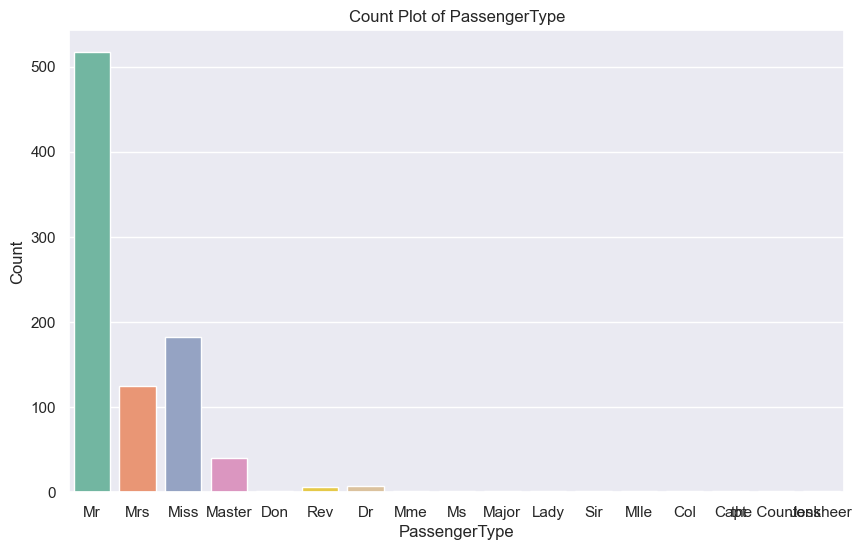

In [482]:
visualize_countplot(data , "PassengerType")

* The Mr is most Passenger Type

In [483]:
# Get A Familysize column
data["FamilySize"] = data["SibSp"] + data["Parch"] +1

In [484]:
data["FamilySize"].isna().sum()

np.int64(0)

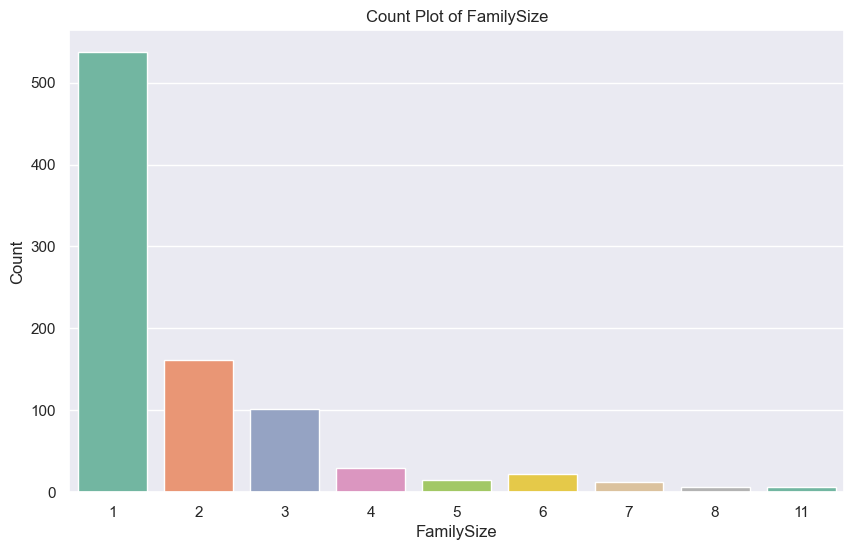

In [485]:
visualize_countplot(data , "FamilySize")

* Most Passengers are alone

In [486]:
# Function to categorize age
def categorize_age(age):
    if pd.isna(age):
        return 'Unknown'
    elif age < 13:
        return 'Child'
    elif 13 <= age < 20:
        return 'Teenager'
    elif 20 <= age < 40:
        return 'Adult'
    elif 40 <= age < 60:
        return 'Middle Age'
    else:
        return 'Senior'

In [487]:
# Apply the function to create a new column for age categories
data['AgeCategory'] = data['Age'].apply(categorize_age)

In [488]:
data['AgeCategory'].nunique() , data['AgeCategory'].unique()

(6,
 array(['Adult', 'Unknown', 'Middle Age', 'Child', 'Teenager', 'Senior'],
       dtype=object))

In [489]:
data['AgeCategory'].isna().sum()

np.int64(0)

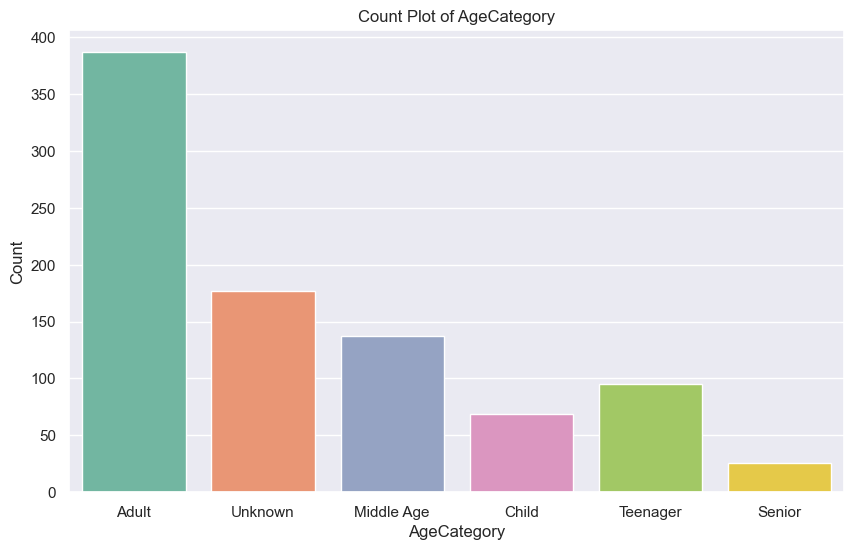

In [490]:
visualize_countplot(data , "AgeCategory")

* Most Passengers Were Adults

# Drop Columnns

In [491]:
data.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerType,FamilySize,AgeCategory
776,777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.75,F38,Q,Mr,1,Unknown


In [492]:
data.drop(["PassengerId" , "Name" , "Cabin"] , axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,PassengerType,FamilySize,AgeCategory
0,0,3,male,22.0,1,0,5,7.2500,S,Mr,2,Adult
1,1,1,female,38.0,1,0,17599,71.2833,C,Mrs,2,Adult
2,1,3,female,26.0,0,0,2,7.9250,S,Miss,1,Adult
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,2,Adult
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr,1,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S,Rev,1,Adult
887,1,1,female,19.0,0,0,112053,30.0000,S,Miss,1,Teenager
888,0,3,female,NaN,1,2,6607,23.4500,S,Miss,4,Unknown
889,1,1,male,26.0,0,0,111369,30.0000,C,Mr,1,Adult


# Correlition

In [493]:
survived_correlation = data.select_dtypes(include=[np.number]).corr()['Survived'].abs().sort_values(ascending=False)
survived_correlation

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Ticket         0.129815
Parch          0.081629
Age            0.077221
SibSp          0.035322
FamilySize     0.016639
PassengerId    0.005007
Name: Survived, dtype: float64

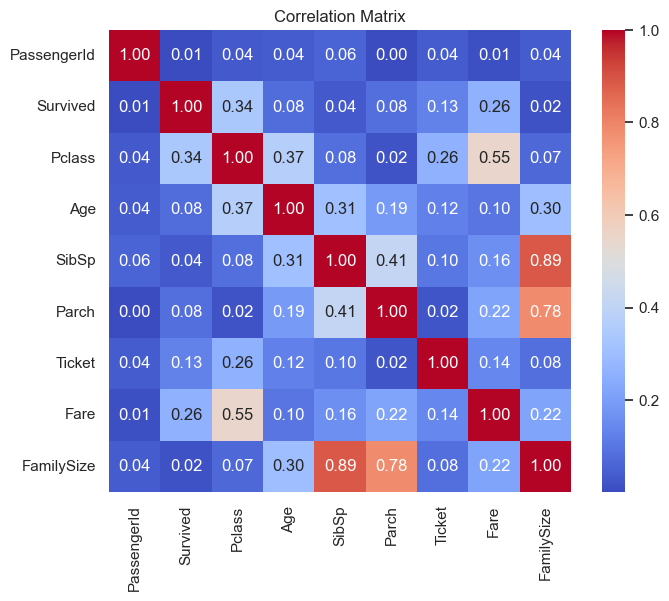

In [494]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.select_dtypes(include=[np.number]).corr().abs(), annot=True, cmap='coolwarm', square=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Data Spiliting

In [495]:
from sklearn.model_selection import train_test_split

x = data.drop(columns=["Survived"]) 
y = data["Survived"] 


xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Date Preprossesing

In [496]:
num_cols = x.select_dtypes(include="number").columns.tolist()

cat_cols = x.select_dtypes(include="object").columns.tolist()
cat_cols = [col for col in cat_cols if col not in ["Pclass", "Embarked"]]

ord_cols = ["Pclass", "Embarked"]

In [497]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from category_encoders import BinaryEncoder

# Numeric columns pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                            StandardScaler())

# Categorical columns pipeline
cat_pipeline = make_pipeline(SimpleImputer(strategy='constant', fill_value='Unknown'),
                             BinaryEncoder())

# Ordinal columns pipeline
ord_pipeline =  make_pipeline(SimpleImputer(strategy='most_frequent'),
                              OrdinalEncoder())

# Ensure correct columns are passed to the right pipelines
full_pipeline = make_column_transformer((num_pipeline, num_cols),
                                        (cat_pipeline, cat_cols),
                                        (ord_pipeline, ord_cols))

# Fit and transform training and test data
xtrain_prep = full_pipeline.fit_transform(xtrain)

# Model Builiding

In [498]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(xtrain_prep, ytrain)  # Fit with training data (features and labels)

# To make predictions on the test set:
y_pred = log_reg.predict_proba(xtrain_prep)

In [499]:
y_pred[:,0]

array([0.74162148, 0.74102084, 0.89878866, 0.89807379, 0.70244534,
       0.30995182, 0.79876785, 0.680559  , 0.92236424, 0.60910613,
       0.08841572, 0.9247299 , 0.76905862, 0.8743034 , 0.87225287,
       0.20582611, 0.04777117, 0.03167921, 0.83299738, 0.03584306,
       0.76850851, 0.94637083, 0.43622916, 0.16296798, 0.19479114,
       0.71276771, 0.20611893, 0.83410568, 0.7438462 , 0.85224216,
       0.9400786 , 0.44809341, 0.86167114, 0.06265617, 0.89463426,
       0.78360783, 0.71845727, 0.30332578, 0.76435826, 0.03952959,
       0.88679706, 0.89412482, 0.16183142, 0.89137639, 0.63233187,
       0.76972033, 0.08302037, 0.83706952, 0.13654532, 0.07329723,
       0.38515887, 0.83394952, 0.10024516, 0.90287599, 0.11735094,
       0.89815956, 0.25845707, 0.01651485, 0.27871269, 0.05045523,
       0.57106275, 0.82927439, 0.11879008, 0.88369221, 0.37437128,
       0.82624989, 0.90611325, 0.92927729, 0.87458339, 0.87693408,
       0.87641823, 0.35368954, 0.88124922, 0.89497011, 0.78734

In [500]:
y_pred[:,1]

array([0.25837852, 0.25897916, 0.10121134, 0.10192621, 0.29755466,
       0.69004818, 0.20123215, 0.319441  , 0.07763576, 0.39089387,
       0.91158428, 0.0752701 , 0.23094138, 0.1256966 , 0.12774713,
       0.79417389, 0.95222883, 0.96832079, 0.16700262, 0.96415694,
       0.23149149, 0.05362917, 0.56377084, 0.83703202, 0.80520886,
       0.28723229, 0.79388107, 0.16589432, 0.2561538 , 0.14775784,
       0.0599214 , 0.55190659, 0.13832886, 0.93734383, 0.10536574,
       0.21639217, 0.28154273, 0.69667422, 0.23564174, 0.96047041,
       0.11320294, 0.10587518, 0.83816858, 0.10862361, 0.36766813,
       0.23027967, 0.91697963, 0.16293048, 0.86345468, 0.92670277,
       0.61484113, 0.16605048, 0.89975484, 0.09712401, 0.88264906,
       0.10184044, 0.74154293, 0.98348515, 0.72128731, 0.94954477,
       0.42893725, 0.17072561, 0.88120992, 0.11630779, 0.62562872,
       0.17375011, 0.09388675, 0.07072271, 0.12541661, 0.12306592,
       0.12358177, 0.64631046, 0.11875078, 0.10502989, 0.21265

In [501]:
from sklearn.metrics import accuracy_score

y_pred_prob = log_reg.predict_proba(xtrain_prep)[:, 1]  
y_pred = (y_pred_prob >= 0.5).astype(int)  

# Now calculate accuracy
accuracy = accuracy_score(ytrain, y_pred)
print(f'Probability: {accuracy * 100:.2f}%')

Probability: 82.87%


In [502]:
from sklearn.metrics import accuracy_score

y_pred_prob = log_reg.predict_proba(xtrain_prep)[:, 0]  
y_pred = (y_pred_prob >= 0.5).astype(int)  

# Now calculate accuracy
accuracy = accuracy_score(ytrain, y_pred)
print(f'Probability: {accuracy * 100:.2f}%')

Probability: 17.13%


# Save Pipeline & Model

In [503]:
from joblib import dump

# Assuming `full_pipeline` is your pipeline
dump(full_pipeline, 'pipeline.joblib')
# Assuming `log_reg` is your trained model
dump(log_reg, 'log_reg_model.joblib')

['log_reg_model.joblib']

#

# Testing

In [504]:
from joblib import load

# Load the pipeline
pipeline = load('pipeline.joblib')

# Load the model
log_reg = load('log_reg_model.joblib')

In [505]:
# Preprocess the test data
xtest_prep = pipeline.transform(xtest)

# Make predictions
predictions = log_reg.predict_proba(xtest_prep)[:, 1]
pred = (predictions >= 0.5).astype(int)  

# Calculate accuracy
accuracy = accuracy_score(ytest, pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 79.33%


Good Luck ❤